In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('ArabLight_2014.csv',delimiter =';')

combi=combi.fillna(0)

In [45]:
I_2011

,Pred Year,Pred brent 2014,Pred FO 1% 2014,Pred FO 3.5% 2014,Pred Jet 2014,Pred ULSD 2014,Pred VGO 2% 2014,TD 2014,Actual 2014,MD 2014
0,2008,75.0,-13.96,-21.85,22.90,22.60,-3.30,-4.64,-2.8,-3.94
1,2009,71.0,-13.27,-18.76,18.56,18.97,-3.91,-4.08,-2.8,NaN
2,2010,82.5,-8.44,-14.03,18.61,18.86,-2.68,-3.89,-2.8,-3.52
3,2011,100.0,1.37,-4.22,28.11,29.72,8.96,-3.74,-2.8,-2.54
4,2012,100.0,-6.84,-11.13,17.09,18.12,1.72,-2.72,-2.8,-2.32
5,2013,100.0,-7.03,-12.15,17.34,18.45,1.87,-2.00,-2.8,-1.30


In [46]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


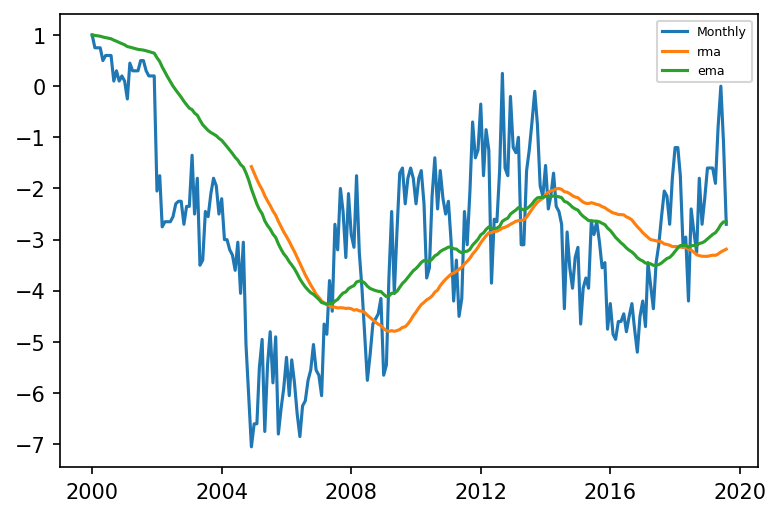

In [47]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Arab light"].rolling(window=60).mean()
ema60 = combi["Arab light"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Arab light"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [48]:
take = 2011

In [36]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-2.15918308]),
 array([-3.34394441]),
 array([-4.16824649]),
 array([-3.9239081]),
 array([-4.06871383]),
 array([-3.56407551])]

In [37]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([-1.7]),
 array([-2.94]),
 array([-4.12916667]),
 array([-4.35]),
 array([-4.73833333]),
 array([-4.415])]

In [49]:
X = combi[['Dated Brent','Jet','VGO 2%','ULSD']]
Y = combi['Arab light']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


DB= I_2011["Pred brent 2014"]
Jet= I_2011["Pred Jet 2014"]
VGO2= I_2011["Pred VGO 2% 2014"]
UL = I_2011["Pred ULSD 2014"]


linear_ArabL=regr.intercept_+ regr.coef_[0]*DB + regr.coef_[1]*Jet + regr.coef_[2]*VGO2 + regr.coef_[3]*UL 
print(linear_ArabL)

Intercept: 
 -1.2998210915080364
Coefficients: 
 [ 0.00540924 -0.16326691  0.1242157   0.04719339]
                            OLS Regression Results                            
Dep. Variable:             Arab light   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     23.50
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           2.57e-16
Time:                        13:24:24   Log-Likelihood:                -439.46
No. Observations:                 236   AIC:                             888.9
Df Residuals:                     231   BIC:                             906.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
nonlinear_ArabL = 7.89067436674442 + 0.0158412920210973*Jet*(VGO2) + 0.00760596666502651*np.power(DB,2) - 0.534520760449475*(DB) - 3.23806029482173e-5*np.power(DB,3) - 1.39671145737361e-9*(VGO2)*np.power(DB,4)


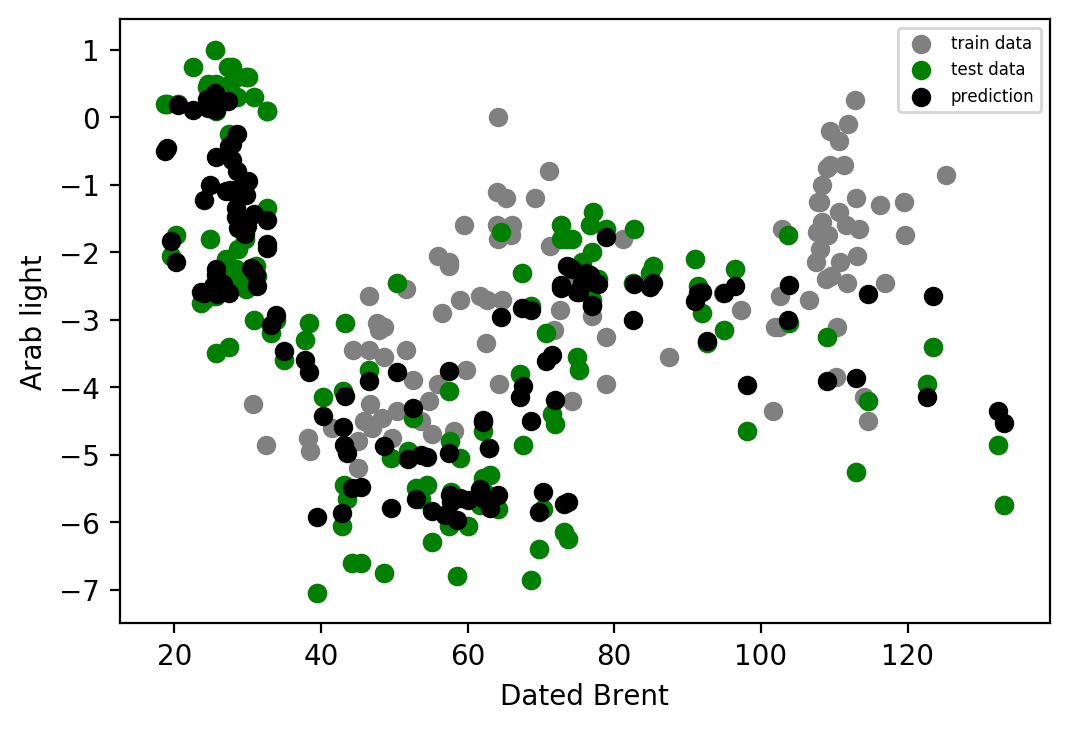

Mean squared error: 0.68
Feature ranking:
Feature Dated Brent (0.409979)
Feature Jet (0.137631)
Feature VGO 2% (0.330675)
Feature ULSD (0.121715)


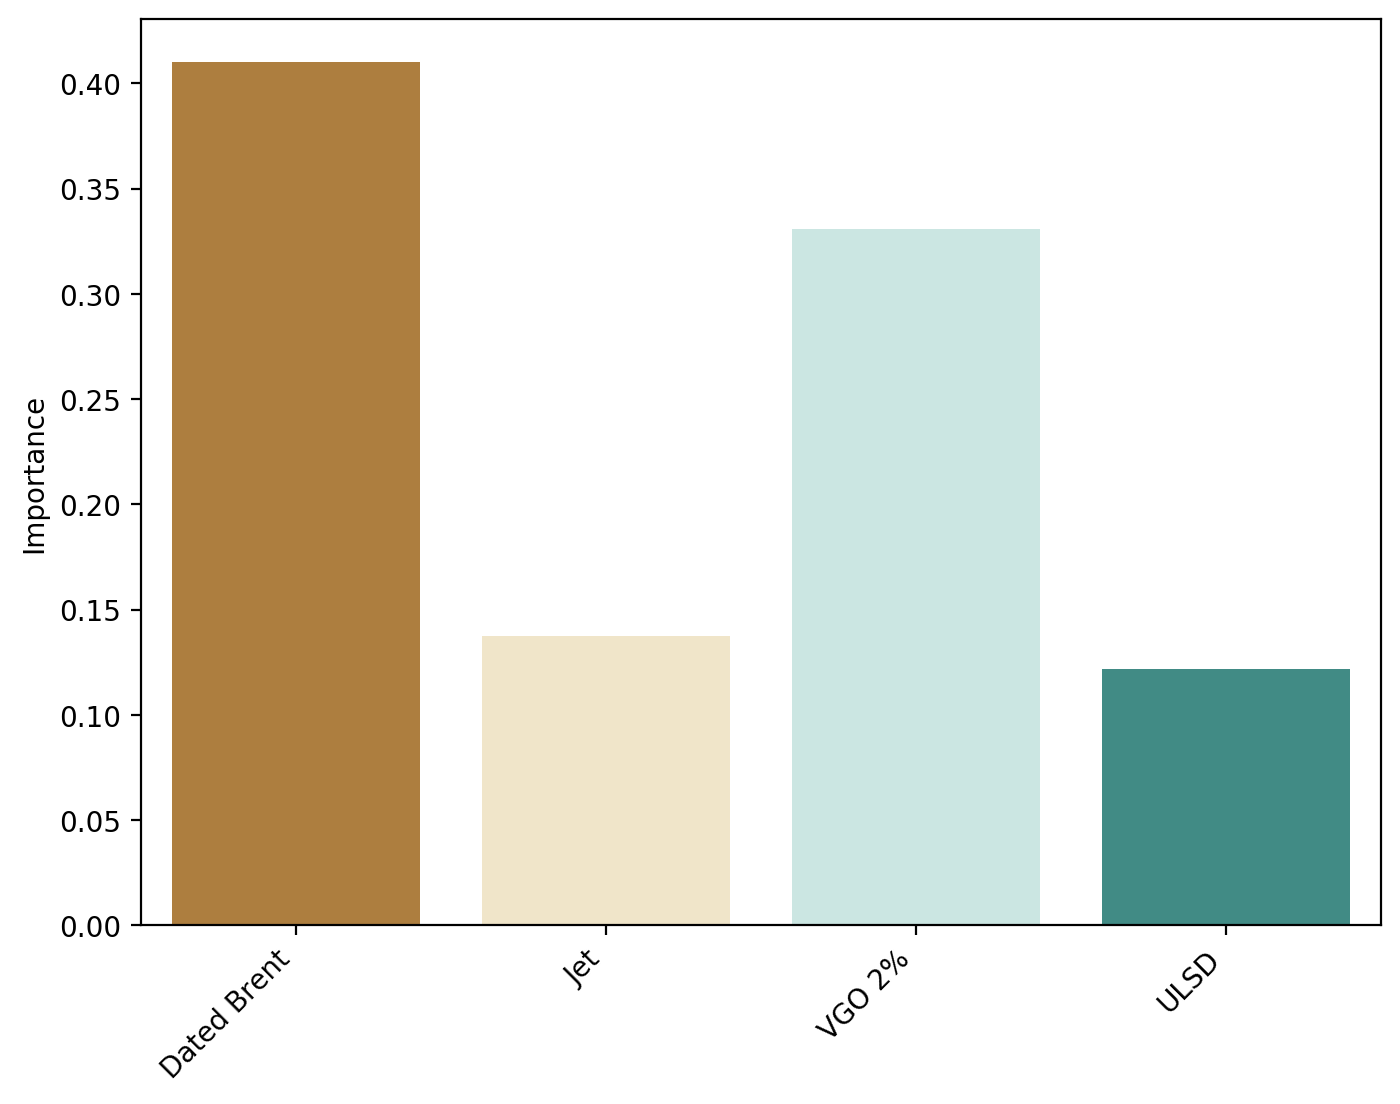

In [51]:
train_combi = combi.iloc[:,1:]
test_combi = combi.iloc[:-100,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Dated Brent", "Jet","VGO 2%","ULSD"]]
y_train=train_combi["Arab light"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Dated Brent", "Jet","VGO 2%","ULSD"]]
y_test=test_combi["Arab light"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dated Brent"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dated Brent"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dated Brent"], y_pred,  color='black')



plt.xlabel("Dated Brent")
plt.ylabel("Arab light")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [53]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]
data_df = pd.concat([DB,Jet,VGO2,UL],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0 -2.983851
1 -2.968936
2 -2.554738
3 -1.703885
4 -2.441965
5 -2.442820


MSE linear = 2.10
MSE non.linear = 3.85
MSE RF = 0.49


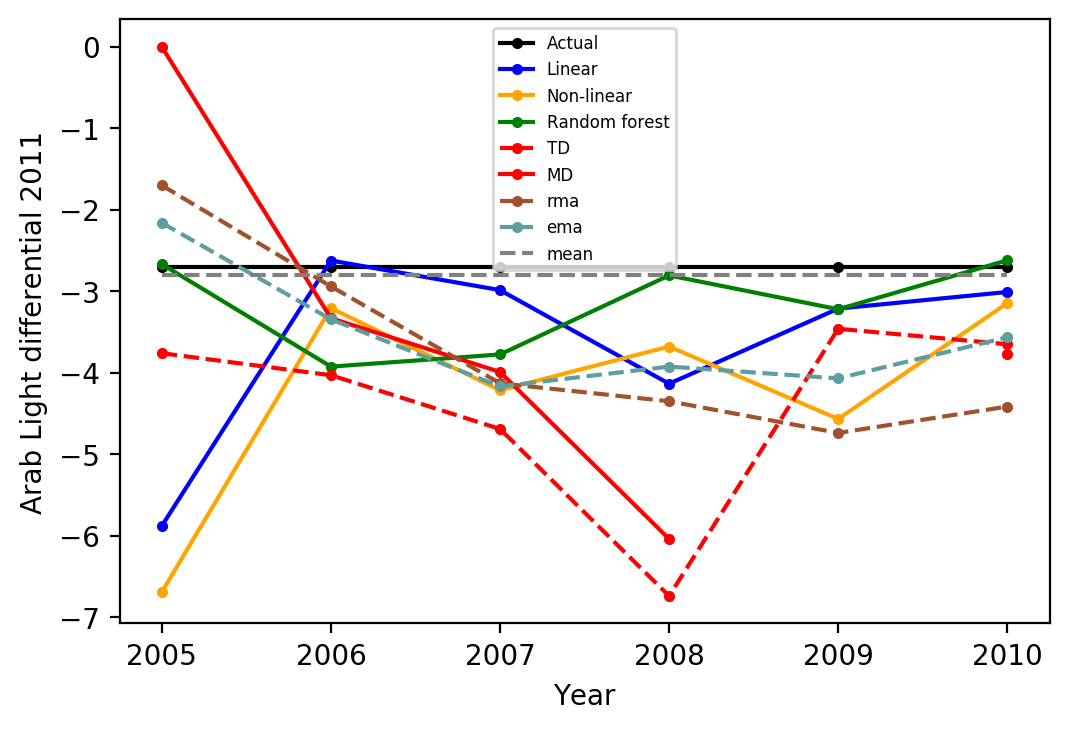

In [17]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_ArabL,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_ArabL,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-2.8,-2.8],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Arab Light differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2011"],linear_ArabL)
mse_NL = mean_squared_error(I_2011["Actual 2011"],nonlinear_ArabL)
mse_RF = mean_squared_error(I_2011["Actual 2011"],y_pred)
#mse_MD = mean_squared_error(I_2011["Actual 2011"],I_2011["MD 2011"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
#print('MSE MD =',"{0:.2f}".format(mse_MD))

MSE linear = 2.76
MSE non.linear = 3.70
MSE RF = 2.82


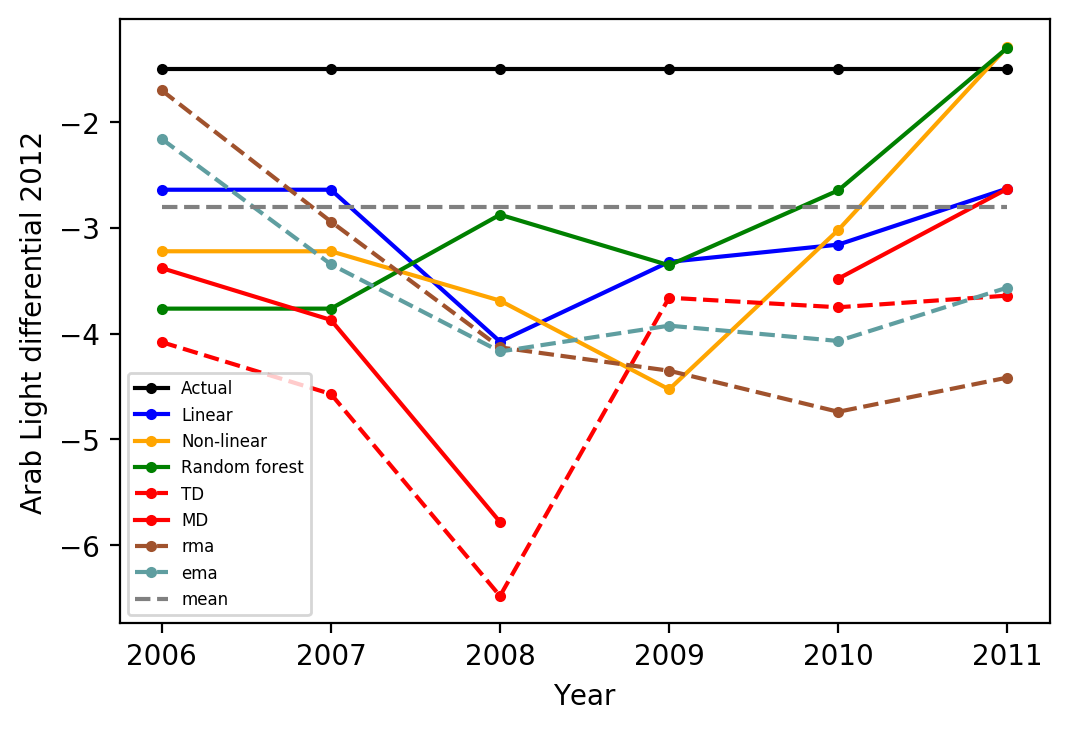

In [30]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_ArabL,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_ArabL,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-2.8,-2.8],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Arab Light differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2012"],linear_ArabL)
mse_NL = mean_squared_error(I_2011["Actual 2012"],nonlinear_ArabL)
mse_RF = mean_squared_error(I_2011["Actual 2012"],y_pred)
#mse_MD = mean_squared_error(I_2011["Actual 2012"],I_2011["MD 2012"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
#print('MSE MD =',"{0:.2f}".format(mse_MD))

MSE linear = 2.78
MSE non.linear = 3.40
MSE RF = 2.03


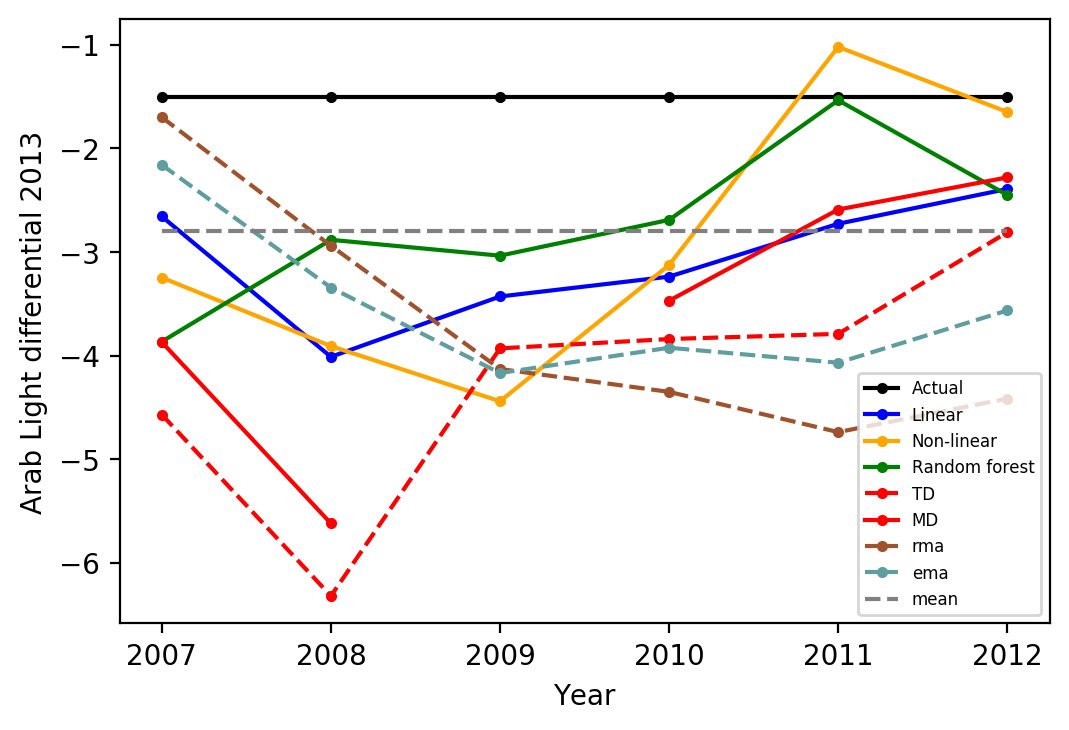

In [43]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_ArabL,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_ArabL,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-2.8,-2.8],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Arab Light differential 2013')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2013"],linear_ArabL)
mse_NL = mean_squared_error(I_2011["Actual 2013"],nonlinear_ArabL)
mse_RF = mean_squared_error(I_2011["Actual 2013"],y_pred)
#mse_MD = mean_squared_error(I_2011["Actual 2011"],I_2011["MD 2011"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
#print('MSE MD =',"{0:.2f}".format(mse_MD))


MSE linear = 0.40
MSE non.linear = 3.38
MSE RF = 0.26


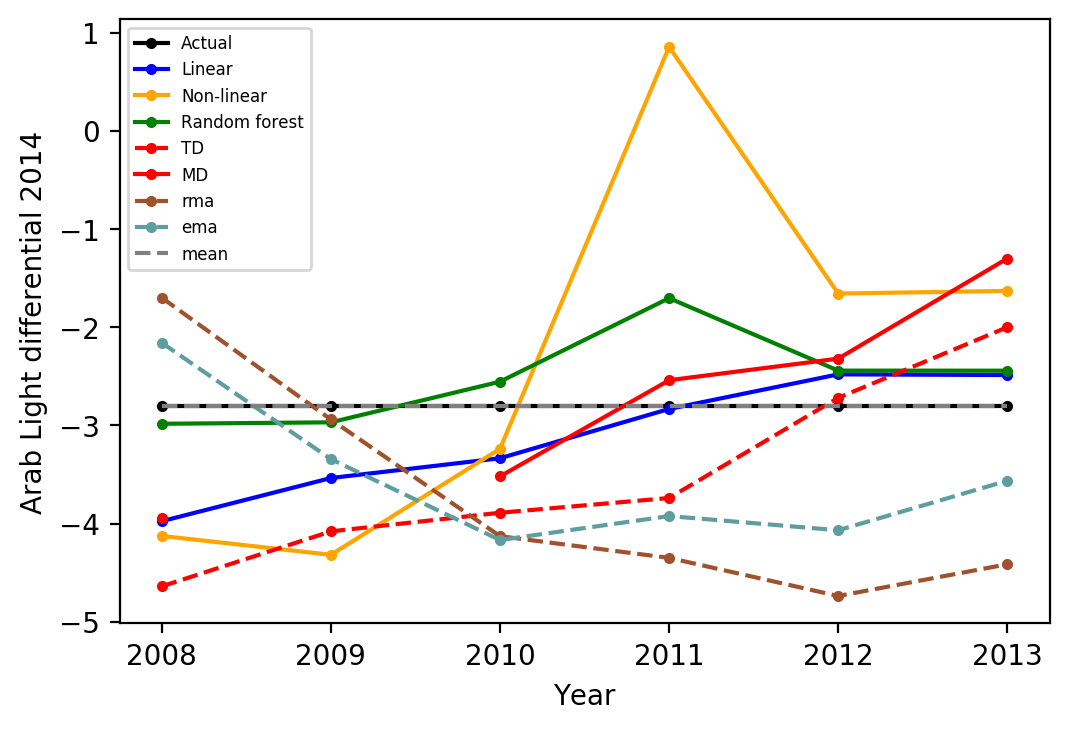

In [54]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2014"],'k.-')
plt.plot(I_2011["Pred Year"],linear_ArabL,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_ArabL,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2014"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2014"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-2.8,-2.8],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Arab Light differential 2014')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2014"],linear_ArabL)
mse_NL = mean_squared_error(I_2011["Actual 2014"],nonlinear_ArabL)
mse_RF = mean_squared_error(I_2011["Actual 2014"],y_pred)
#mse_MD = mean_squared_error(I_2011["Actual 2011"],I_2011["MD 2011"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
#print('MSE MD =',"{0:.2f}".format(mse_MD))
